In [7]:
import numpy as np
import pandas as pd

### Import datasets

In [3]:
data_ICM_type = pd.read_csv("data/data_ICM_type.csv")
data_ICM_length = pd.read_csv("data/data_ICM_length.csv", index_col=False)
interactions = pd.read_csv("data/interactions_and_impressions.csv")

/var/folders/f1/t7pg4vg155x4hjw8rxwkp19w0000gn/T/ipykernel_51835/2485813128.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactions = pd.read_csv("data/interactions_and_impressions.csv")


In [4]:
all_items_id = pd.concat([interactions["ItemID"], data_ICM_length["item_id"], data_ICM_type["item_id"]], ignore_index=True).unique()
data_ICM_length.drop(columns=["feature_id", "item_id"], inplace=True)
data_ICM_type.drop(columns=["data","item_id"], inplace=True)

#### Control null values in the datasets

In [14]:
print("Number of null values in ICM_length: "+str(data_ICM_length["data"].isna().sum()))
print("Number of null values in ICM_type: "+str(data_ICM_type["feature_id"].isna().sum()))

Number of null values in ICM_length: 0
Number of null values in ICM_type: 0


### Visualize ICM_length dataset

<AxesSubplot:>

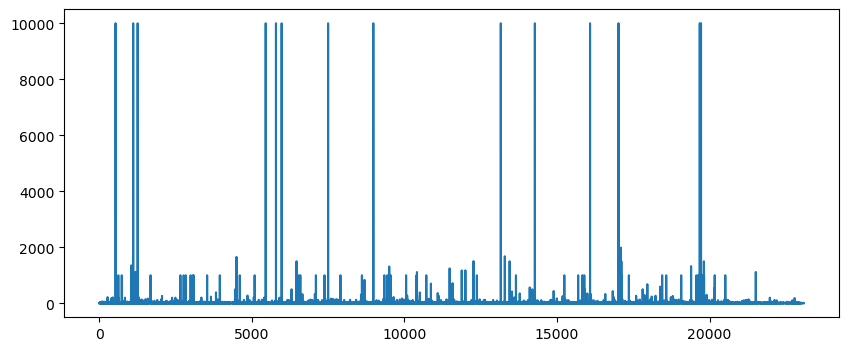

In [8]:
data_ICM_length["data"].plot(figsize=(10,4))

#### Removing outliers (values > 1000)

<AxesSubplot:>

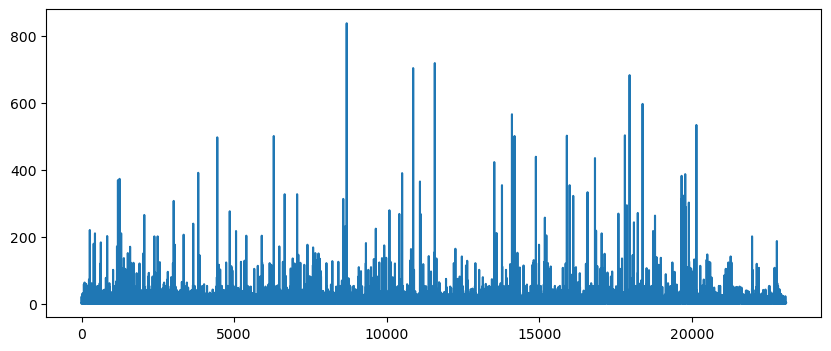

In [11]:
data_ICM_length.drop(data_ICM_length[data_ICM_length["data"]>1000].index, inplace=True)
data_ICM_length["data"].plot(figsize=(10,4))

#### Visualize sorted values

<AxesSubplot:>

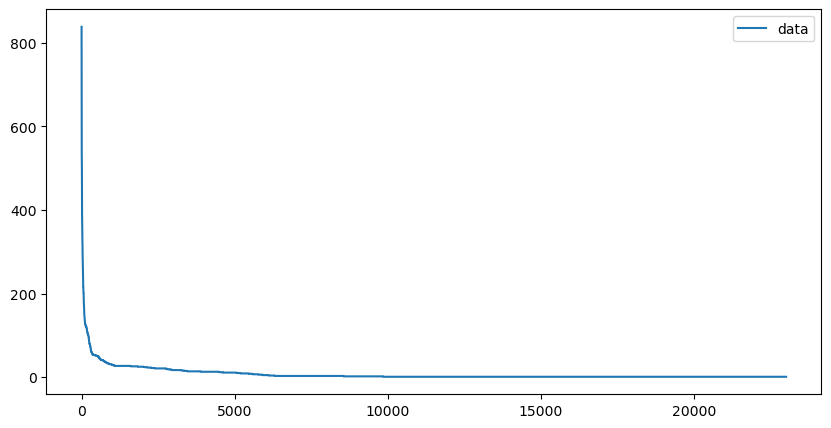

In [12]:
data_ICM_length_sorted = pd.DataFrame(data_ICM_length.sort_values(by=["data"], ascending=False))
data_ICM_length_sorted.index = [x for x in range(1, len(data_ICM_length.data)+1)]
data_ICM_length_sorted.plot(figsize=(10,5))

## One-hot encoding

#### Groups division:
1 puntata -> "breve"

tra 2 e 30 -> "media"

30 e 80 -> "lunga"

80 e 1000 -> "molto lunga"

1000 e 10000 -> "outlier"

####  Create column for one-hot encoding (ICM_length)

In [13]:
length = []
for index, row in data_ICM_length.iterrows():
    if(row["data"] == 1):
        length.append("one_episode")
    elif(row["data"]>1 and row["data"]<30):
        length.append("medium")
    elif(row["data"]>=30 and row["data"]<80):
        length.append("long")
    elif(row["data"]>=80 and row["data"]<1000):
        length.append("very_long")
    else:
        length.append("outlier")

data_ICM_length["dummy"] = length
one_hot = pd.get_dummies(data_ICM_length.dummy, prefix='dummy')
one_hot

,dummy_long,dummy_medium,dummy_one_episode,dummy_very_long
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
23086,0,0,1,0
23087,0,0,1,0
23088,0,0,1,0
23089,0,0,1,0


In [41]:
# Add the one-hot encoding to the dataset
data_ICM_length = data_ICM_length.join(one_hot)
# Remove the previous columns
data_ICM_length.drop(columns=["data","dummy"], inplace=True)
# Final dataset
data_ICM_length

,dummy_long,dummy_medium,dummy_one_episode,dummy_outlier,dummy_very_long
0,0,0,1,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
23086,0,0,1,0,0
23087,0,0,1,0,0
23088,0,0,1,0,0
23089,0,0,1,0,0


#### Do the same for the ICM_type

In [42]:
one_hot = pd.get_dummies(data_ICM_type.feature_id, prefix='dummy')
data_ICM_type = data_ICM_type.join(one_hot)
data_ICM_type.drop(columns=["feature_id"], inplace=True)
data_ICM_type

,dummy_1,dummy_2,dummy_3,dummy_4,dummy_7
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
23086,1,0,0,0,0
23087,0,1,0,0,0
23088,1,0,0,0,0
23089,1,0,0,0,0


#### Join all the encodings in a single dataset

In [43]:
ICM_complete = pd.DataFrame(data_ICM_type)
ICM_complete = ICM_complete.join(data_ICM_length)
ICM_complete

,dummy_1,dummy_2,dummy_3,dummy_4,dummy_7,dummy_long,dummy_medium,dummy_one_episode,dummy_outlier,dummy_very_long
0,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
23086,1,0,0,0,0,0,0,1,0,0
23087,0,1,0,0,0,0,0,1,0,0
23088,1,0,0,0,0,0,0,1,0,0
23089,1,0,0,0,0,0,0,1,0,0


In [46]:
# Save the dataset as a csv
#ICM_complete.to_csv('data/ICM_one_hot.csv')  